In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data = pd.read_csv('drive/My Drive/creditcard.csv')


In [ ]:
x = data['Amount']

In [ ]:
x.mean()

88.34961925087359

In [ ]:
x = (x-x.mean())/x.std()
x

0         0.244964
1        -0.342474
2         1.160684
3         0.140534
4        -0.073403
            ...   
284802   -0.350150
284803   -0.254116
284804   -0.081839
284805   -0.313248
284806    0.514354
Name: Amount, Length: 284807, dtype: float64

In [ ]:
data['Normalized_Amounts'] = x
data = data.drop(['Time' , 'Amount'], axis =1)


In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amounts
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342474
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160684
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [ ]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']


Sampling Data for ratio 50/50
________________________________________________________________________

In [ ]:
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


Sampling Data for ratio 10 / 90
______________________________________________________________________

In [ ]:
#RATIO =  10/90

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices10_90 = np.random.choice(normal_indices,9*number_records_fraud, replace = False)
random_normal_indices10_90 = np.array(random_normal_indices10_90)

# Appending the 2 indices
under_sample_indices10_90 = np.concatenate([fraud_indices,random_normal_indices10_90])

# Under sample dataset
under_sample_data10_90 = data.iloc[under_sample_indices10_90,:]

X_undersample10_90 = under_sample_data10_90.iloc[:, under_sample_data10_90.columns != 'Class']
y_undersample10_90 = under_sample_data10_90.iloc[:, under_sample_data10_90.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data10_90[under_sample_data10_90.Class == 0])/len(under_sample_data10_90))
print("Percentage of fraud transactions: ", len(under_sample_data10_90[under_sample_data10_90.Class == 1])/len(under_sample_data10_90))
print("Total number of transactions in resampled data: ", len(under_sample_data10_90))

Percentage of normal transactions:  0.9
Percentage of fraud transactions:  0.1
Total number of transactions in resampled data:  4920


Sampling Data for ratio 34/66
________________________________________________________________________

In [ ]:
## RATIO =  34/66


import math
# Out of the indices we picked, randomly select "x" number (number_records_fraud)
ratio = 66/34
random_normal_indices34_66 = np.random.choice(normal_indices,math.ceil(ratio*number_records_fraud), replace = False)
random_normal_indices34_66 = np.array(random_normal_indices34_66)

# Appending the 2 indices
under_sample_indices34_66 = np.concatenate([fraud_indices,random_normal_indices34_66])

# Under sample dataset
under_sample_data34_66 = data.iloc[under_sample_indices34_66,:]

X_undersample34_66 = under_sample_data34_66.iloc[:, under_sample_data34_66.columns != 'Class']
y_undersample34_66 = under_sample_data34_66.iloc[:, under_sample_data34_66.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data34_66[under_sample_data34_66.Class == 0])/len(under_sample_data34_66))
print("Percentage of fraud transactions: ", len(under_sample_data34_66[under_sample_data34_66.Class == 1])/len(under_sample_data34_66))
print("Total number of transactions in resampled data: ", len(under_sample_data34_66))
ratio

Percentage of normal transactions:  0.6602209944751382
Percentage of fraud transactions:  0.3397790055248619
Total number of transactions in resampled data:  1448


1.9411764705882353

In [ ]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset

# Ratio 50/50
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))
print("*******************************************************************")


#Ratio 10/90
X_train_undersample10_90, X_test_undersample10_90, y_train_undersample10_90, y_test_undersample10_90 = train_test_split(X_undersample10_90
                                                                                                   ,y_undersample10_90
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample10_90))
print("Number transactions test dataset: ", len(X_test_undersample10_90))
print("Total number of transactions: ", len(X_train_undersample10_90)+len(X_test_undersample10_90))
print("*******************************************************************")

#Ratio 34/66
X_train_undersample34_66, X_test_undersample34_66, y_train_undersample34_66, y_test_undersample34_66 = train_test_split(X_undersample34_66
                                                                                                   ,y_undersample34_66
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample34_66))
print("Number transactions test dataset: ", len(X_test_undersample34_66))
print("Total number of transactions: ", len(X_train_undersample34_66)+len(X_test_undersample34_66))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984
*******************************************************************

Number transactions train dataset:  3444
Number transactions test dataset:  1476
Total number of transactions:  4920
*******************************************************************

Number transactions train dataset:  1013
Number transactions test dataset:  435
Total number of transactions:  1448


In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

SVM CLASSIFIER
___________________
_____________________________

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


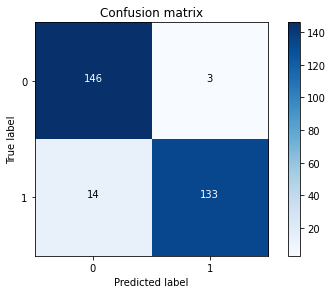

In [ ]:
#  UNDERSAMPLED DATA
#  Ratio 50/50
classifier = svm.SVC(kernel='linear') 
classifier.fit(X_train_undersample,y_train_undersample)

y_pred_undersample = classifier.predict(X_test_undersample)
class_names=np.array(['0','1'])
cm = confusion_matrix(y_test_undersample, y_pred_undersample)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("Accuracy Score :")
print(accuracy_score(y_test_undersample, y_pred_undersample))
print("Classification Report :")
print(classification_report(y_test_undersample, y_pred_undersample))

We have detected 133 frauds / 147 total frauds.

So, the probability to detect a fraud is 0.9047619047619048
Accuracy Score :
0.9425675675675675
Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       149
           1       0.98      0.90      0.94       147

    accuracy                           0.94       296
   macro avg       0.95      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [ ]:
classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state) 
y_pred_undersample_score = classifier.fit(X_train_undersample,y_train_undersample.values.ravel().decision_function(X_test_undersample.values)
[ fpr, tpr, thresholds ]= roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SyntaxError: ignored

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


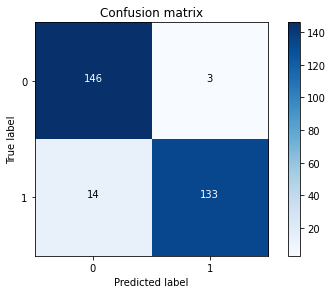

In [ ]:
#  Ratio 10/90
classifier10_90 = svm.SVC(kernel='linear') 
classifier10_90.fit(X_train_undersample10_90,y_train_undersample10_90)

y_pred_undersample10_90 = classifier.predict(X_test_undersample10_90)
class_names=np.array(['0','1'])
cm2 = confusion_matrix(y_test_undersample10_90, y_pred_undersample10_90)
plot_confusion_matrix(cm2,class_names)

In [ ]:
print('We have detected ' + str(cm2[1][1]) + ' frauds / ' + str(cm2[1][1]+cm2[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm2[1][1]/(cm2[1][1]+cm2[1][0])))
print("Accuracy Score :")
print(accuracy_score(y_test_undersample10_90, y_pred_undersample10_90))
print("Classification Report :")
print(classification_report(y_test_undersample10_90, y_pred_undersample10_90))

We have detected 117 frauds / 131 total frauds.

So, the probability to detect a fraud is 0.8931297709923665
Accuracy Score :
0.9654471544715447
Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1345
           1       0.76      0.89      0.82       131

    accuracy                           0.97      1476
   macro avg       0.87      0.93      0.90      1476
weighted avg       0.97      0.97      0.97      1476



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


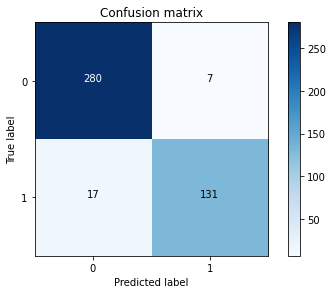

In [ ]:
#  Ratio 34/66
classifier34_66 = svm.SVC(kernel='linear') 
classifier34_66.fit(X_train_undersample34_66,y_train_undersample34_66)

y_pred_undersample34_66 = classifier.predict(X_test_undersample34_66)
class_names=np.array(['0','1'])
cm3 = confusion_matrix(y_test_undersample34_66, y_pred_undersample34_66)
plot_confusion_matrix(cm3,class_names)

In [ ]:
print('We have detected ' + str(cm3[1][1]) + ' frauds / ' + str(cm3[1][1]+cm3[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm3[1][1]/(cm3[1][1]+cm3[1][0])))
print("Accuracy Score :")
print(accuracy_score(y_test_undersample34_66, y_pred_undersample34_66))
print("Classification Report :")
print(classification_report(y_test_undersample34_66, y_pred_undersample34_66))

We have detected 131 frauds / 148 total frauds.

So, the probability to detect a fraud is 0.8851351351351351
Accuracy Score :
0.9448275862068966
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       287
           1       0.95      0.89      0.92       148

    accuracy                           0.94       435
   macro avg       0.95      0.93      0.94       435
weighted avg       0.94      0.94      0.94       435



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


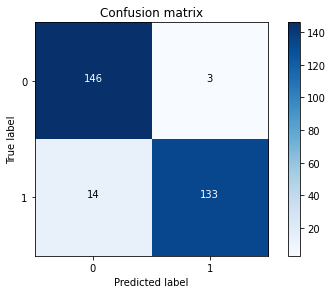

In [ ]:
# WHOLE DATA
# Ratio 50/50
classifier2 = svm.SVC(kernel='linear') 
classifier2.fit(X_train_undersample,y_train_undersample)
y_pred = classifier2.predict(X_test)
class_names=np.array(['0','1'])
cm4 = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm4,class_names)

In [ ]:
print('We have detected ' + str(cm4[1][1]) + ' frauds / ' + str(cm4[1][1]+cm4[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm4[1][1]/(cm4[1][1]+cm4[1][0])))
print("Accuracy Score :")
print(accuracy_score(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test, y_pred))

We have detected 136 frauds / 147 total frauds.

So, the probability to detect a fraud is 0.9251700680272109
Accuracy Score :
0.9728708027573938
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.06      0.93      0.11       147

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.98     85443



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


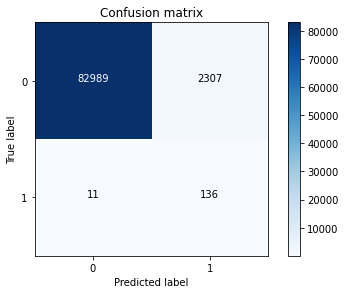

In [ ]:
# Ratio 10/90
classifier2_10_90 = svm.SVC(kernel='linear') 
classifier2_10_90.fit(X_train_undersample,y_train_undersample)
y_pred = classifier2_10_90.predict(X_test)
class_names=np.array(['0','1'])
cm5 = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm5,class_names)

In [ ]:
print('We have detected ' + str(cm5[1][1]) + ' frauds / ' + str(cm5[1][1]+cm5[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm5[1][1]/(cm5[1][1]+cm5[1][0])))
print("the accuracy is : "+str((cm5[0][0]+cm5[1][1]) / (sum(cm5[0]) + sum(cm5[1]))))

We have detected 136 frauds / 147 total frauds.

So, the probability to detect a fraud is 0.9251700680272109
the accuracy is : 0.9728708027573938


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


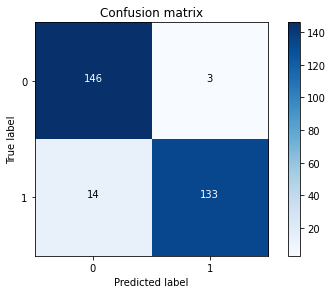

In [ ]:
# Ratio 34_66
classifier2_34_66 = svm.SVC(kernel='linear') 
classifier2_34_66.fit(X_train_undersample,y_train_undersample)
y_pred = classifier2_34_66.predict(X_test)
class_names=np.array(['0','1'])
cm6 = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm6,class_names)

In [ ]:
print('We have detected ' + str(cm6[1][1]) + ' frauds / ' + str(cm6[1][1]+cm6[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm6[1][1]/(cm6[1][1]+cm6[1][0])))
print("the accuracy is : "+str((cm6[0][0]+cm6[1][1]) / (sum(cm6[0]) + sum(cm6[1]))))

We have detected 136 frauds / 147 total frauds.

So, the probability to detect a fraud is 0.9251700680272109
the accuracy is : 0.9728708027573938


LOGISTIC REGRESSION
_________________________________________________________________________________
______________________________________________________________________________________


In [ ]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = 0.001, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

ValueError: ignored

/Users/rahul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.9455782312925171


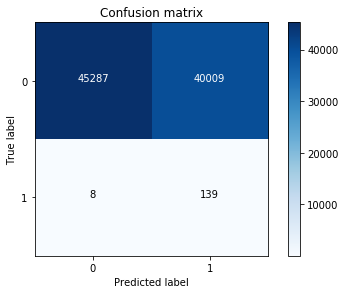

In [ ]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = 0.001, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [ ]:
# ROC CURVE
lr = LogisticRegression(C = 0.001, penalty = 'l1')
y_pred_undersample_score = lr.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


ValueError: ignored

/Users/rahul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.6190476190476191


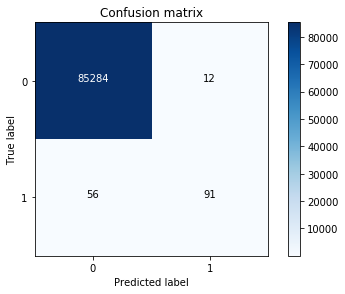

In [ ]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = 10, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

/Users/rahul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.9727891156462585
Recall metric in the testing dataset:  0.9183673469387755
Recall metric in the testing dataset:  0.891156462585034
Recall metric in the testing dataset:  0.8299319727891157
Recall metric in the testing dataset:  0.782312925170068
Recall metric in the testing dataset:  0.6054421768707483


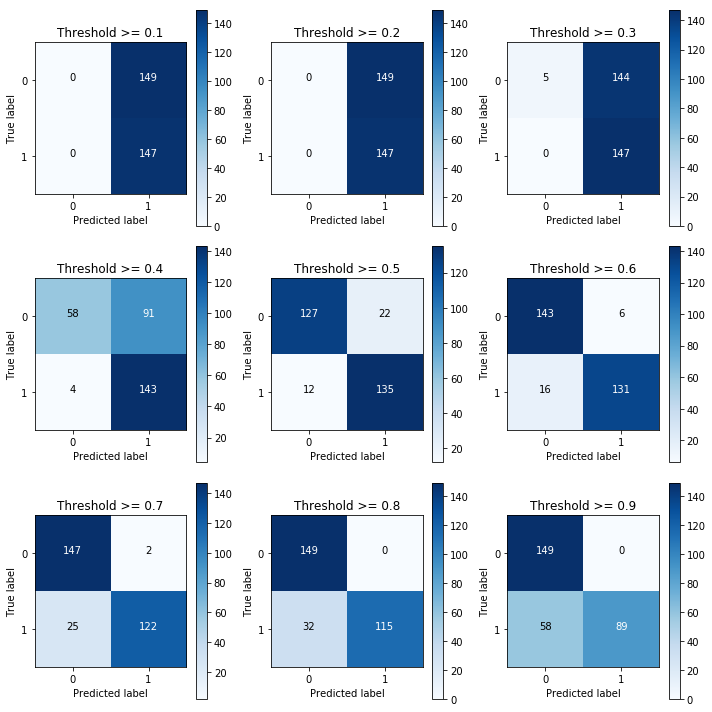

In [ ]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 


/Users/rahul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


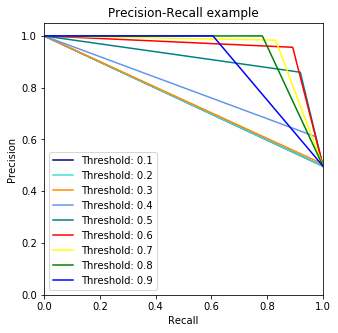

In [ ]:
from itertools import cycle

lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_undersample_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test_undersample,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")